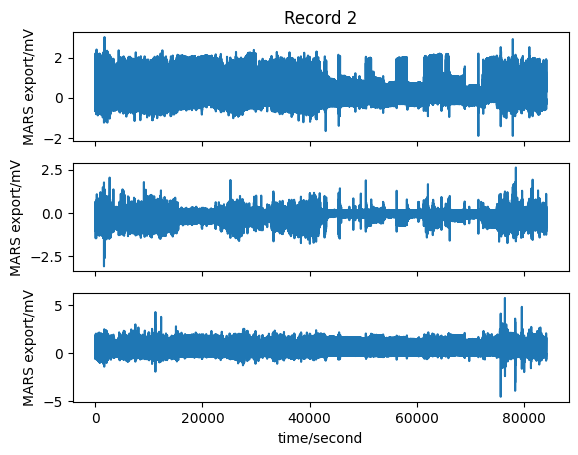

In [11]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt

# 레코드를 읽기
record = wfdb.rdrecord(r'D:\extract\bora_2')
#record = wfdb.rdrecord('d:\\eee\\22571_75836304')
record

# 해당 레코드의 플롯 그리기
wfdb.plot.plot_wfdb(record=record, title='Record 2')


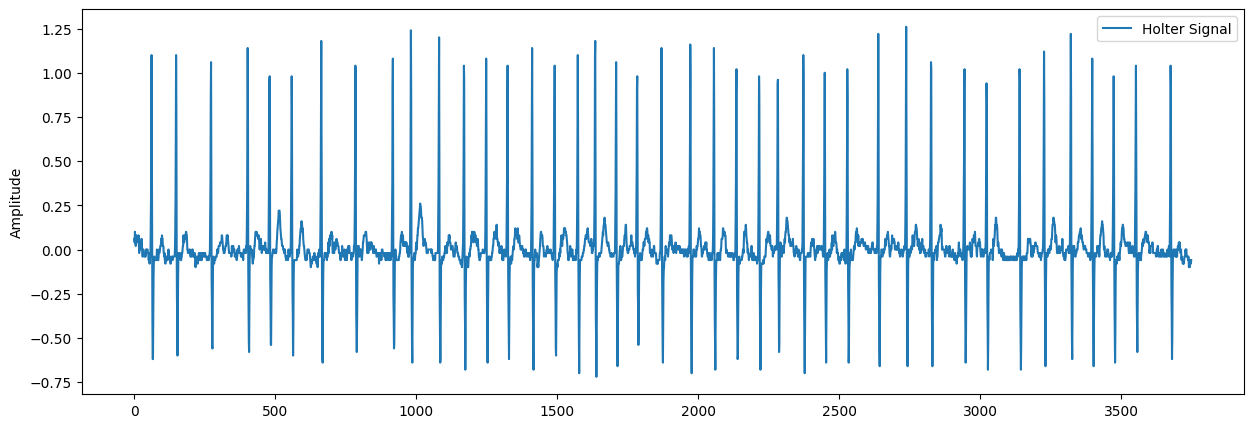

R-R Intervals (in seconds): [0.696 0.992 1.04  ... 0.04  0.256 0.424]


In [9]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks



# 신호 추출
signal = record.p_signal[:, 0]  # 첫 번째 채널 사용

# R 피크 찾기
peaks, _ = find_peaks(signal, height=np.mean(signal) + 0.5 * np.std(signal))

# R-R 간격 계산
rr_intervals = np.diff(peaks) / record.fs  # fs는 샘플링 주파수

# 30초 구간 선택
fs = record.fs  # 샘플링 주파수
start_time = 0  # 시작 시간 (초)
end_time = 30  # 종료 시간 (초)
start_sample = int(start_time * fs)
end_sample = int(end_time * fs)

# 선택된 구간의 신호 및 피크
selected_signal = signal[start_sample:end_sample]
selected_peaks = peaks[(peaks >= start_sample) & (peaks < end_sample)] - start_sample

# 결과 출력
plt.figure(figsize=(15, 5))
plt.plot(selected_signal, label='Holter Signal')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print("R-R Intervals (in seconds):", rr_intervals)


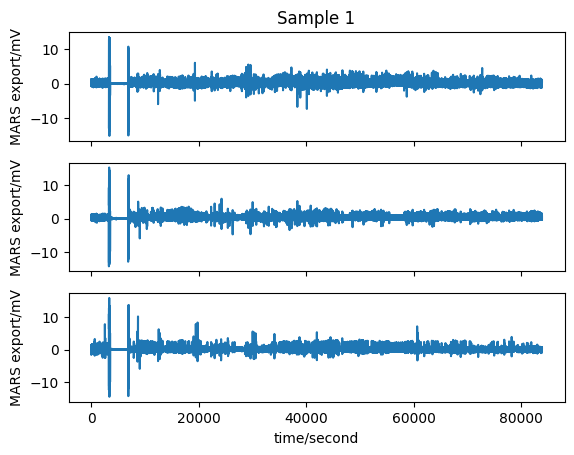

{'record_name': 'bora_1',
 'n_sig': 3,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10485000,
 'base_time': datetime.time(16, 24, 48),
 'base_date': datetime.date(2024, 10, 23),
 'comments': [],
 'sig_name': ['MARS export', 'MARS export', 'MARS export'],
 'p_signal': array([[ 0.06, -0.02,  0.02],
        [ 0.04, -0.02,  0.06],
        [ 0.1 , -0.06,  0.1 ],
        ...,
        [-0.06, -0.1 , -0.12],
        [ 0.32, -0.12,  0.04],
        [ 0.84, -0.2 ,  0.32]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['bora_1.SIG', 'bora_1.SIG', 'bora_1.SIG'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [None, None, None],
 'adc_gain': [50.0, 50.0, 50.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'mV'],
 'adc_res': [0, 0, 0],
 'adc_zero': [0, 0, 0],
 'init_value': [3, -1, 1],
 'checksum': [5532, -4133, -4629],
 'block_size': [0, 0, 0]}

In [7]:
wfdb.plot_wfdb(record=record, title='Sample 1') 
display(record.__dict__)

In [8]:
# 샘플링 주파수 출력
print(f"Sampling frequency of the record: {record.fs} Hz")


Sampling frequency of the record: 125 Hz


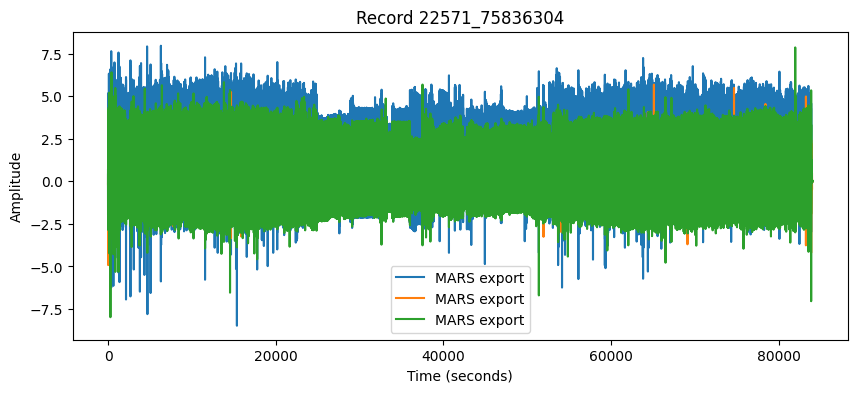

,MARS export,MARS export,MARS export
0,0.66,-0.18,0.38
1,0.56,-0.18,0.36
2,0.32,-0.10,0.26
3,0.04,0.04,0.12
4,-0.22,0.12,-0.02
5,-0.42,0.16,-0.14
6,-0.56,0.16,-0.24
7,-0.64,0.14,-0.32
8,-0.66,0.14,-0.36
9,-0.66,0.18,-0.34


In [ ]:
# 시간 벡터 생성
time = [i / record.fs for i in range(record.sig_len)]

# 플롯 생성
plt.figure(figsize=(10, 4))
for i in range(record.n_sig):
    plt.plot(time, record.p_signal[:, i], label=record.sig_name[i])
plt.legend()
plt.title('Record 22571_75836304')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# 레코드 데이터를 DataFrame으로 변환
df = pd.DataFrame(record.p_signal, columns=record.sig_name)
df.head(10)

In [ ]:
record.p_signal

array([[ 0.66, -0.18,  0.38],
       [ 0.56, -0.18,  0.36],
       [ 0.32, -0.1 ,  0.26],
       ...,
       [ 0.  ,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.02],
       [ 0.  ,  0.02,  0.02]])

In [ ]:
# Transpose the DataFrame so columns represent channels
df_transposed = df.T

# Convert transposed DataFrame to XML
xml_elements = []
for channel, values in enumerate(df_transposed.values, start=1):
    signal_data = ','.join(map(str, values))
    xml_elements.append(f'<WaveformData lead="{channel}">{signal_data}</WaveformData>')

# Combine all XML elements
xml_string = "<data>\n" + "\n".join(xml_elements) + "\n</data>"

# Define the file path where you want to save the XML
xml_file_path = 'C:\\Users\\SNUH\\Desktop\\export\\4_73189235.xml'

# Write the XML string to the file
with open(xml_file_path, 'w', encoding='utf-8') as xml_file:
    xml_file.write(xml_string)

print(f"XML file has been saved to {xml_file_path}")

XML file has been saved to C:\Users\SNUH\Desktop\export\4_73189235.xml


In [ ]:
import wfdb
import pandas as pd

# 레코드를 읽기
record_path = 'C:\\Users\\SNUH\\Desktop\\export\\4_73189235'
record = wfdb.rdrecord(record_path)

# 레코드 데이터를 DataFrame으로 변환
df = pd.DataFrame(record.p_signal, columns=record.sig_name)
# Transpose the DataFrame so columns represent channels
df_transposed = df.T

# Convert transposed DataFrame to XML
xml_elements = []
for channel, values in enumerate(df_transposed.values, start=1):
    signal_data = ','.join(map(str, values))
    xml_elements.append(f'<WaveformData lead="{channel}">{signal_data}</WaveformData>')

# Combine all XML elements
xml_string = "<data>\n" + "\n".join(xml_elements) + "\n</data>"

# Define the file path where you want to save the XML
xml_file_path = 'C:\\Users\\SNUH\\Desktop\\export\\4_73189235.xml'

# Write the XML string to the file
with open(xml_file_path, 'w', encoding='utf-8') as xml_file:
    xml_file.write(xml_string)

print(f"XML file has been saved to {xml_file_path}")

XML file has been saved to C:\Users\SNUH\Desktop\export\4_73189235.xml
